In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir("C:\\Users\\ASC\\Downloads")

In [3]:
df = pd.read_csv("generateddata.csv", skiprows=2) #Skip the header lines
df

,4.52 V\t\t9.71 A\t\t28.90 °C
0,4.69 V\t\t8.61 A\t\t22.65 °C
1,1.78 V\t\t1.52 A\t\t23.28 °C
2,1.00 V\t\t8.86 A\t\t20.54 °C
3,1.83 V\t\t9.03 A\t\t22.01 °C
4,2.11 V\t\t3.41 A\t\t24.22 °C
5,3.93 V\t\t6.13 A\t\t20.19 °C
6,2.97 V\t\t9.62 A\t\t23.50 °C
7,4.89 V\t\t7.60 A\t\t20.13 °C
8,3.68 V\t\t2.22 A\t\t21.23 °C
9,2.66 V\t\t1.73 A\t\t20.32 °C


In [4]:
# Split the data into voltage, current, and temperature readings
voltage = 'data[:, 0]'
current = 'data[:, 1]'
temperature = 'data[:, 2]'

In [14]:

# Normalize the data
voltage_norm = 'float(voltage - np.min(voltage)) / (np.max(voltage) - np.min(voltage))'
current_norm = 'float(current - np.min(current)) / (np.max(current) - np.min(current))'
temperature_norm ='float(temperature - np.min(temperature)) / (np.max(temperature) - np.min(temperature))'


In [6]:
# Combine the normalized data into input sequences
X = np.stack((voltage_norm, current_norm, temperature_norm), axis=-1)

In [7]:
# Generate labels (predicting next voltage value)
'y = np.roll(voltage_norm,-1)'
'y[-1] = voltage_norm[-1]' # Set last value to current value for consistency

'y[-1] = voltage_norm[-1]'

In [8]:
# Reshape data for input to RNN
'X = X.reshape(-1, 1, 3)'
'y = y.reshape(-1, 1)'

'y = y.reshape(-1, 1)'

In [9]:
# Define and compile the RNN model
model = Sequential([
    LSTM(units=64, input_shape=(1, 3)),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

C:\local disk c\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Train the model
'model.fit(X,y,epochs=10,batch_size=1)'

'model.fit(X,y,epochs=10,batch_size=1)'

In [11]:
#Data for battery fault detection 
time=[1,2,3,4,5]
#Time in hours
voltage=[4.18,3.93,3.68,2.97,2.65]
#Battery voltage in volts

<function matplotlib.pyplot.show(close=None, block=None)>

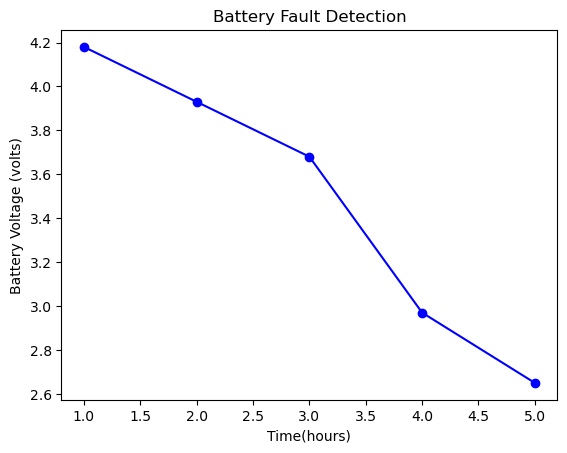

In [12]:
#Plotting the predictions
from sklearn import metrics
'matrix=metrics.confusion_matrix(Y_predicted,Y_test)'

#Plotting the line graph
plt.plot(time,voltage,marker='o',linestyle='-',color='blue')

#Adding lables and title
plt.xlabel('Time(hours)')
plt.ylabel('Battery Voltage (volts)')  
plt.title('Battery Fault Detection')    

#Displaying the graph
plt.show